In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path

import pandas as pd
import scanpy as sc
from openslide import OpenSlide

from scellst.constant import PREDS_DIR
from sCellST_reproducibility.reproducibility_notebooks.utils_analyses import compute_signature_scores, load_predictions
from sCellST_reproducibility.reproducibility_notebooks.utils_plot import plot_gene_gallery, plot_corr_score, plot_signature_score

15:51:52 INFO: PROJ_ROOT path is: /home/loic/PycharmProjects/CellST


In [3]:
LIST_SCORE_TO_PLOT = [
    "fibroblast",
    "endothelial cell",
    "lymphocyte",
    "plasma cell",
    "fallopian tube secretory\nepithelial cell",
]

In [4]:
# Input
data_dir = Path("../../hest_data")
spot_adata_path = data_dir / "st" / "TENX65.h5ad"
wsi_path = data_dir / "wsis" / "TENX65.tif"
prediction_adata_path = PREDS_DIR / "exp" / "mil" / "embedding_tag=moco-TENX65-rn50_train;genes=marker_ovary;train_slide=TENX65;test_slide=TENX65;infer_mode=inference.h5ad"

# Output
save_path = Path("figures/marker")
save_path.mkdir(exist_ok=True)

In [6]:
# Load data
cell_adata = load_predictions(prediction_adata_path)
print(cell_adata)
sc.pp.normalize_total(cell_adata, target_sum=1e4)
sc.pp.scale(cell_adata)
wsi = OpenSlide(wsi_path)
df_marker = pd.read_csv("../../data/genes_marker_ovary.csv", index_col=0)

/home/loic/miniconda3/envs/CellST/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 309923 × 130
    obs: 'barcode', 'label', 'class'
    uns: 'cell_embedding_path', 'hest_id', 'log1p', 'patch_size_src', 'spatial'
    obsm: 'spatial'


In [6]:
df_marker['group'] = df_marker['group'].replace('fallopian tube secretory epithelial cell', 'fallopian tube secretory\nepithelial cell')
cell_adata.obs["class"] = cell_adata.obs["class"].replace("fallopian tube secretory epithelial cell", "fallopian tube secretory\nepithelial cell")

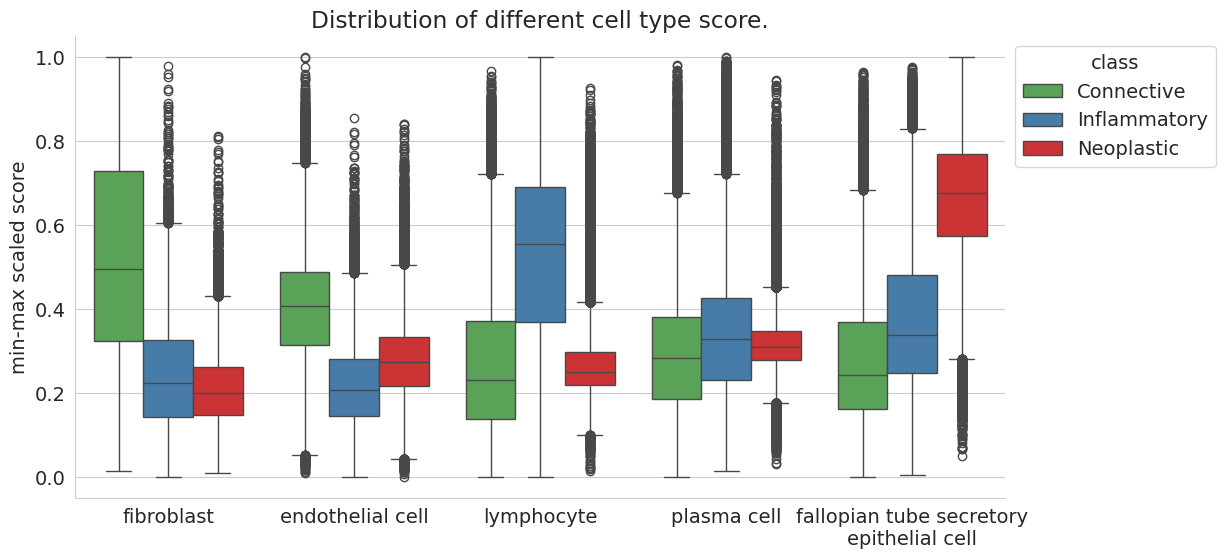

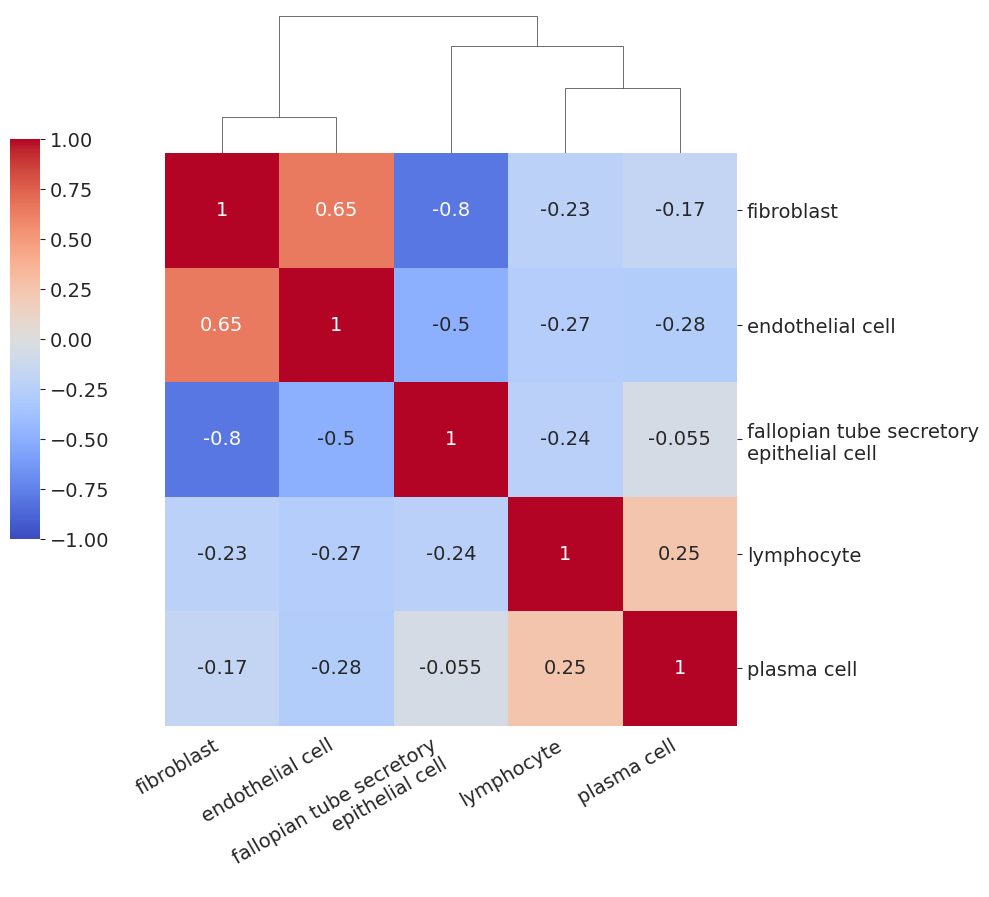

In [7]:
# Signature scores
df_marker = df_marker[df_marker["gene"].isin(cell_adata.var_names)]
compute_signature_scores(cell_adata, df_marker)

plot_signature_score(cell_adata, obs_key="class", list_scores=LIST_SCORE_TO_PLOT, save_path=os.path.join(save_path, "gene_score.png"))
plot_corr_score(cell_adata, list_scores=LIST_SCORE_TO_PLOT, save_path=os.path.join(save_path, "gene_corr.png"))

In [8]:
# Cell gallery
for grp in ["lymphocyte", "plasma cell", "endothelial cell", "fibroblast", "fallopian tube secretory\nepithelial cell"]:
    print(f"Plotting {grp}")
    plot_gene_gallery(
        cell_adata,
        color=grp,
        wsi=wsi,
        save_path=os.path.join(save_path, f"gallery_{grp}"),
    )

Plotting lymphocyte
Plotting plasma cell
Plotting endothelial cell
Plotting fibroblast
Plotting fallopian tube secretory
epithelial cell


In [9]:
# Cell gallery
for cell_label in ["Connective", "Neoplastic"]:
    plot_gene_gallery(
        cell_adata[cell_adata.obs["class"] == cell_label],
        color="plasma cell",
        wsi=wsi,
        save_path=os.path.join(save_path, f"gallery_plasma_cell_classified_as_{cell_label}"),
        title=f"Plasma cells classified as {cell_label}"
    )

In [10]:
# Input
prediction_adata_path = PREDS_DIR / "exp" / "mil" / "embedding_tag=imagenet-rn50_train;genes=marker_ovary;train_slide=TENX65;test_slide=TENX65;infer_mode=inference.h5ad"

In [11]:
# Read cell data
cell_adata = load_predictions(prediction_adata_path)
sc.pp.normalize_total(cell_adata, target_sum=1e4)
sc.pp.scale(cell_adata)

/home/loic/miniconda3/envs/CellST/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [12]:
compute_signature_scores(cell_adata, df_marker)

In [13]:
# Cell gallery
for grp in ["lymphocyte", "plasma cell", "endothelial cell", "fibroblast", "fallopian tube secretory\nepithelial cell"]:
    print(f"Plotting {grp}")
    plot_gene_gallery(
        cell_adata,
        color=grp,
        wsi=wsi,
        save_path=os.path.join(save_path, f"gallery_imagenet_{grp}"),
    )

Plotting lymphocyte
Plotting plasma cell
Plotting endothelial cell
Plotting fibroblast
Plotting fallopian tube secretory
epithelial cell
